In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

jtplot.style()

In [2]:
def show_images(im_dict, cols, shape = (1,1), length = None, size = 8):
    if not length:
        length = len(im_dict)
    else:
        length = max(length, len(im_dict))
    w_size = shape[1] / sum(shape) * size
    h_size = shape[0] / sum(shape) * size
    rows = np.ceil(length / cols)
    fig = plt.figure(figsize=(w_size*cols, h_size*rows))
    i = 0
    for key, value in im_dict.items():
        i += 1
        if len(value.shape) > 2:
            conv = cv.COLOR_BGR2RGB
        else:
            conv = cv.COLOR_GRAY2RGB
        im = cv.cvtColor(value, conv)
        sub = fig.add_subplot(rows, cols, i)
        sub.set_title(key)
        plt.axis('off')
        plt.imshow(im)
    return fig

In [4]:
src = cv.imread('cat.jpg')
dst = src.copy()
template = cv.imread('cat_detail.png')
h, w, d = template.shape

res = cv.matchTemplate(src,template,cv.TM_CCOEFF)
res = cv.normalize(res, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
_ = cv.rectangle(dst, top_left, bottom_right, [255,255,255], 3)


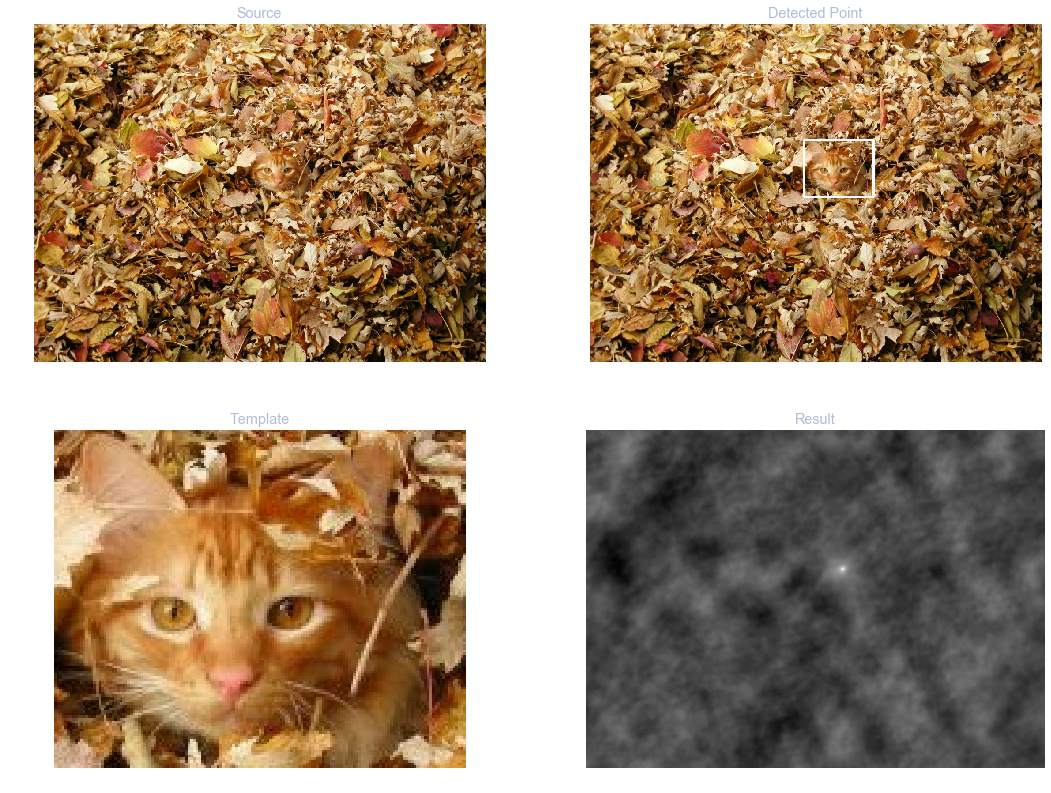

In [6]:
im_dict = {
    'Source':src,
    'Detected Point':dst,
    'Template':template,
    'Result':res
}

cols = 2
size = 16
fig = show_images(im_dict, cols, shape = src.shape, size = size)